# Google Takeout Data Youtube

In this notebook, we are going to visualize Youtube data from Google. To download your data, just do the same as in the `Google Takeout Location Data` notebook, but select the `YouTube Activity`.

このノートブックでは、GoogleのYoutubeのデータを可視化する予定です。データをダウンロードするには、`Google Takeout Location Data`ノートブックと同じように、`YouTube Activity`を選択するだけです。

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns

# Search history / 検索履歴

Let's take a look on your search history.

検索履歴を見てみましょう。

In [3]:
path = "PATH_TO_YOUR_FILE"
df_search_history = pd.read_json(path)

df_search_history

,header,title,titleUrl,time,products,activityControls,details
0,YouTube,Searched for red swan piano,https://www.youtube.com/results?search_query=r...,2022-01-19T23:59:29.835Z,[YouTube],[YouTube search history],NaN
1,YouTube,Searched for snk op s3 pt1 piano,https://www.youtube.com/results?search_query=s...,2022-01-19T23:59:04.356Z,[YouTube],[YouTube search history],NaN
2,YouTube,Searched for re take,https://www.youtube.com/results?search_query=r...,2022-01-19T23:50:13.961Z,[YouTube],[YouTube search history],NaN
3,YouTube,Searched for rei theme evangelion piano,https://www.youtube.com/results?search_query=r...,2022-01-19T23:11:40.785Z,[YouTube],[YouTube search history],NaN
4,YouTube,Searched for surf mac miller,https://www.youtube.com/results?search_query=s...,2022-01-19T18:34:01.834Z,[YouTube],[YouTube search history],NaN
...,...,...,...,...,...,...,...
5516,YouTube,Searched for musique 2015 nouveauté,https://www.youtube.com/results?search_query=m...,2015-05-15T18:31:40.475Z,[YouTube],[YouTube search history],NaN
5517,YouTube,Searched for boom clap,https://www.youtube.com/results?search_query=b...,2015-05-15T18:27:53.900Z,[YouTube],[YouTube search history],NaN
5518,YouTube,Searched for pop 2014 dj earworm,https://www.youtube.com/results?search_query=p...,2015-05-15T18:24:36.806Z,[YouTube],[YouTube search history],NaN
5519,YouTube,Searched for gangnam style,https://www.youtube.com/results?search_query=g...,2015-05-15T18:24:16.613Z,[YouTube],[YouTube search history],NaN


Replace `PATH_TO_YOUR_FILE` by the path where your YouTube `search-history.json` is stored on your device. 

`PATH_TO_YOUR_FILE` は、YouTube の `search-history.json` が保存されているパスで置き換えてください。

**What are we looking for the most?** / **最も多く閲覧してる動画は？**

In [4]:
df_search_history['title']=df_search_history['title'].apply(lambda x: x.replace('Searched for', ''))
df_search_history=df_search_history.drop(['header','titleUrl','products','activityControls','details'],axis=1)
df_search_history

,title,time
0,red swan piano,2022-01-19T23:59:29.835Z
1,snk op s3 pt1 piano,2022-01-19T23:59:04.356Z
2,re take,2022-01-19T23:50:13.961Z
3,rei theme evangelion piano,2022-01-19T23:11:40.785Z
4,surf mac miller,2022-01-19T18:34:01.834Z
...,...,...
5516,musique 2015 nouveauté,2015-05-15T18:31:40.475Z
5517,boom clap,2015-05-15T18:27:53.900Z
5518,pop 2014 dj earworm,2015-05-15T18:24:36.806Z
5519,gangnam style,2015-05-15T18:24:16.613Z


We have cleaned a lot our data.

私たちは、多くのデータをクリーニングしました。

In [5]:
df_search_history['title'].value_counts()

 Gotaga                 95
 Zack nani              69
 zack nani              56
 gotaga                 56
 thekairi78             51
                        ..
 i need a doctor         1
 these days              1
 voyage léger nekfeu     1
 nabil fekir anglais     1
 c'est la vie            1
Name: title, Length: 3741, dtype: int64

We can look at a specified year.

年を指定して見ることもできます。

In [6]:
df_2016 = df_search_history.copy()
df_2016['time']=df_search_history['time'].apply(lambda x: x.find('2016')) #if year=2016 it will replace time by 0
df_2016

,title,time
0,red swan piano,-1
1,snk op s3 pt1 piano,-1
2,re take,-1
3,rei theme evangelion piano,-1
4,surf mac miller,-1
...,...,...
5516,musique 2015 nouveauté,-1
5517,boom clap,-1
5518,pop 2014 dj earworm,-1
5519,gangnam style,-1


In [7]:
df_2016=df_2016[df_2016['time']==0]
df_2016

,title,time
4025,suis-je deen burbigo,0
4026,take a mic panda freestyle,0
4027,take a mic panda,0
4028,singing don't worry,0
4029,Paul richard,0
...,...,...
5254,monster remix,0
5255,deen burbigo luc bresson,0
5256,guizo plongé dans ma folie,0
5257,vald selfie,0


In [8]:
df_2016['title'].value_counts()

 Gotaga                          93
 Zack nani                       68
 gotaga                          53
 thekairi78                      50
 zack nani                       48
                                 ..
 one two three four five          1
 Vicomte                          1
 complot canal + harry potter     1
 princesse nekfeu                 1
 vald bonjour                     1
Name: title, Length: 636, dtype: int64

# Watch History / 閲覧履歴

In [9]:
path = "PATH_TO_YOUR_FILE"
df_watch_history = pd.read_json(path)

df_watch_history

,header,title,titleUrl,subtitles,time,products,activityControls,details
0,YouTube,Watched 🇫🇷 Comment peut-on encore miser sur Be...,https://www.youtube.com/watch?v=VtDH8SEUQdo,"[{'name': 'Talk My Football', 'url': 'https://...",2022-01-20T06:11:11.637Z,[YouTube],[YouTube watch history],NaN
1,YouTube,Watched Red Swan - Attack on Titan Season 3 OP...,https://www.youtube.com/watch?v=sWcgKts80vM,"[{'name': 'PianoDeuss', 'url': 'https://www.yo...",2022-01-19T23:59:32.366Z,[YouTube],[YouTube watch history],NaN
2,YouTube,"Watched [Attack on Titan Season 3 OP 1] ""Red S...",https://www.youtube.com/watch?v=NxGVE9mGwlo,"[{'name': 'Fonzi M - Melodies on Piano', 'url'...",2022-01-19T23:59:16.340Z,[YouTube],[YouTube watch history],NaN
3,YouTube,Watched L'Attaque des Titans (S3) EN 13 MINUTE...,https://www.youtube.com/watch?v=zWZbPDbn-6Q,"[{'name': 'Re: Take', 'url': 'https://www.yout...",2022-01-19T23:50:34.417Z,[YouTube],[YouTube watch history],NaN
4,YouTube,Watched Attack on Titan OST - Vogel im Käfig (...,https://www.youtube.com/watch?v=L8YIB2L6g3E,"[{'name': 'PianoDeuss', 'url': 'https://www.yo...",2022-01-19T23:15:38.027Z,[YouTube],[YouTube watch history],NaN
...,...,...,...,...,...,...,...,...
21635,YouTube,Watched Charli XCX - Break The Rules [Official...,https://www.youtube.com/watch?v=ABhDiXbUaBE,"[{'name': 'Charli XCX', 'url': 'https://www.yo...",2015-05-15T18:31:08.007Z,[YouTube],[YouTube watch history],NaN
21636,YouTube,Watched Charli XCX - Boom Clap (Lyrics Officia...,https://www.youtube.com/watch?v=ek1f0Sb7v70,"[{'name': 'xxChloexx', 'url': 'https://www.you...",2015-05-15T18:27:59.780Z,[YouTube],[YouTube watch history],NaN
21637,YouTube,Watched LYRICS - DJ Earworm Mashup - United St...,https://www.youtube.com/watch?v=B4a0bqOCJdY,"[{'name': 'Dj Earworm', 'url': 'https://www.yo...",2015-05-15T18:24:42.967Z,[YouTube],[YouTube watch history],NaN
21638,YouTube,Watched https://www.youtube.com/watch?v=LSZ915...,https://www.youtube.com/watch?v=LSZ915DfDmI,NaN,2015-05-15T18:22:45.762Z,[YouTube],[YouTube watch history],NaN


Replace `PATH_TO_YOUR_FILE` by the path to the Youtube `watch-history.json` file stored on your device.

`PATH_TO_YOUR_FILE` は、あなたのデバイスに保存されている Youtube の `watch-history.json` ファイルへのパスで置き換えてください。

**Let's clean the data**

**データをクリーニングしてみましょう**

In [10]:
df_watch_history['title']=df_watch_history['title'].apply(lambda x: x.replace('Watched', ''))
df_watch_history=df_watch_history.drop(['header','titleUrl','products','activityControls','details'],axis=1)
df_final=pd.DataFrame(df_watch_history['subtitles'].explode().apply(pd.Series))
df_watch_history['subtitles']=df_final['name']
df_watch_history.rename(columns={'subtitles':'channel'}, inplace=True)


In [11]:
df_watch_history

,title,channel,time
0,🇫🇷 Comment peut-on encore miser sur Ben Arfa ...,Talk My Football,2022-01-20T06:11:11.637Z
1,Red Swan - Attack on Titan Season 3 OP (Piano...,PianoDeuss,2022-01-19T23:59:32.366Z
2,"[Attack on Titan Season 3 OP 1] ""Red Swan"" - ...",Fonzi M - Melodies on Piano,2022-01-19T23:59:16.340Z
3,L'Attaque des Titans (S3) EN 13 MINUTES | RE:...,Re: Take,2022-01-19T23:50:34.417Z
4,Attack on Titan OST - Vogel im Käfig (Piano),PianoDeuss,2022-01-19T23:15:38.027Z
...,...,...,...
21635,Charli XCX - Break The Rules [Official Video],Charli XCX,2015-05-15T18:31:08.007Z
21636,Charli XCX - Boom Clap (Lyrics Official Video),xxChloexx,2015-05-15T18:27:59.780Z
21637,LYRICS - DJ Earworm Mashup - United State of ...,Dj Earworm,2015-05-15T18:24:42.967Z
21638,https://www.youtube.com/watch?v=LSZ915DfDmI,NaN,2015-05-15T18:22:45.762Z


**What is our favorite Youtube Channel?** / **最も再生されているYoutubeチャンネルは？**

In [12]:
df_watch_history['channel'].value_counts().head(3)

ZACK      442
Wiloo     433
GOTAGA    354
Name: channel, dtype: int64

**When are we the most active on YouTube?** / **最もYouTubeを見ている時間帯は？**

We are going to filter by hour every records. Of course you can be more precise by arounding to the upper ou the lower hour depending on the minute value. For example: `20h17 => 20h` and `20h43 => 21h`.

すべてのレコードを時間でフィルタリングしてみましょう。もちろん、分単位の値に応じて、上位または下位の時間帯に移動することで、より正確にすることができます。例えば、`20h17 => 20h` や `20h43 => 21h` といった具合です。

In [13]:
df_watch_history['time'] = df_watch_history['time'].apply(pd.to_datetime).dt.tz_convert('Europe/Berlin')
df_watch_history['time'] = df_watch_history['time'].apply(lambda x: x.replace(minute=0, second=0, microsecond=0))
df_watch_history

,title,channel,time
0,🇫🇷 Comment peut-on encore miser sur Ben Arfa ...,Talk My Football,2022-01-20 07:00:00+01:00
1,Red Swan - Attack on Titan Season 3 OP (Piano...,PianoDeuss,2022-01-20 00:00:00+01:00
2,"[Attack on Titan Season 3 OP 1] ""Red Swan"" - ...",Fonzi M - Melodies on Piano,2022-01-20 00:00:00+01:00
3,L'Attaque des Titans (S3) EN 13 MINUTES | RE:...,Re: Take,2022-01-20 00:00:00+01:00
4,Attack on Titan OST - Vogel im Käfig (Piano),PianoDeuss,2022-01-20 00:00:00+01:00
...,...,...,...
21635,Charli XCX - Break The Rules [Official Video],Charli XCX,2015-05-15 20:00:00+02:00
21636,Charli XCX - Boom Clap (Lyrics Official Video),xxChloexx,2015-05-15 20:00:00+02:00
21637,LYRICS - DJ Earworm Mashup - United State of ...,Dj Earworm,2015-05-15 20:00:00+02:00
21638,https://www.youtube.com/watch?v=LSZ915DfDmI,NaN,2015-05-15 20:00:00+02:00


In [14]:
df_watch_history['hour'] = df_watch_history['time'].apply(lambda x: x.hour)
df_watch_history

,title,channel,time,hour
0,🇫🇷 Comment peut-on encore miser sur Ben Arfa ...,Talk My Football,2022-01-20 07:00:00+01:00,7
1,Red Swan - Attack on Titan Season 3 OP (Piano...,PianoDeuss,2022-01-20 00:00:00+01:00,0
2,"[Attack on Titan Season 3 OP 1] ""Red Swan"" - ...",Fonzi M - Melodies on Piano,2022-01-20 00:00:00+01:00,0
3,L'Attaque des Titans (S3) EN 13 MINUTES | RE:...,Re: Take,2022-01-20 00:00:00+01:00,0
4,Attack on Titan OST - Vogel im Käfig (Piano),PianoDeuss,2022-01-20 00:00:00+01:00,0
...,...,...,...,...
21635,Charli XCX - Break The Rules [Official Video],Charli XCX,2015-05-15 20:00:00+02:00,20
21636,Charli XCX - Boom Clap (Lyrics Official Video),xxChloexx,2015-05-15 20:00:00+02:00,20
21637,LYRICS - DJ Earworm Mashup - United State of ...,Dj Earworm,2015-05-15 20:00:00+02:00,20
21638,https://www.youtube.com/watch?v=LSZ915DfDmI,NaN,2015-05-15 20:00:00+02:00,20


We made a column containing all the hour-value. Let's group them.

すべての時間値を含む列を作りました。グループ化しましょう。

In [15]:
gb = df_watch_history.groupby('hour')

<AxesSubplot:xlabel='hour'>

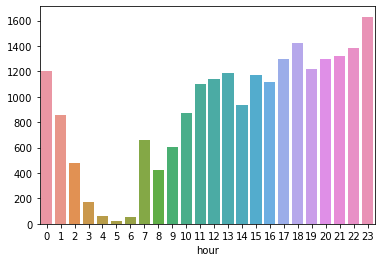

In [16]:
result = gb.size()
sns.barplot(x = result.index, y = result.values)

And here we are! We have an idea of our behaviour on YouTube. We could go deeper and analyze keywords, channels...

今回はここまでです！ YouTubeでの私たちの行動を把握することができました。もっと深く掘り下げて、キーワードやチャンネルに基づいて分析をすることも可能です。